'''

@Author: Jayesh Patil

@Date: 15-11-24

@Title: KNN to Predict Salary is above 50 k or not

'''

2.Based on given users data like his work area, qualification, marrital status, predicted whether user will make more than 50k a year or not

Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats


Loading Dataset

In [2]:
df = pd.read_csv('classification_2.csv',header=None, na_values=' ?', 
                 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                        'hours-per-week', 'native-country', 'income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Analyzing dataset

In [3]:
print(df.describe())
print(df.info())
print(df.shape)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries

Handling null values

In [4]:
print("Null Values \n",df.isna().sum())


Null Values 
 age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [5]:
df.shape

(32561, 15)

In [6]:
columns_with_missing = ['workclass', 'occupation', 'native-country']
for column in columns_with_missing:
    mode_value = df[column].mode()[0]  # Find the mode
    df[column].fillna(mode_value, inplace=True) 


C:\Users\Jayesh\AppData\Local\Temp\ipykernel_14384\4028873730.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [7]:
print("Null Values \n",df.isna().sum())


Null Values 
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Checking Outliers

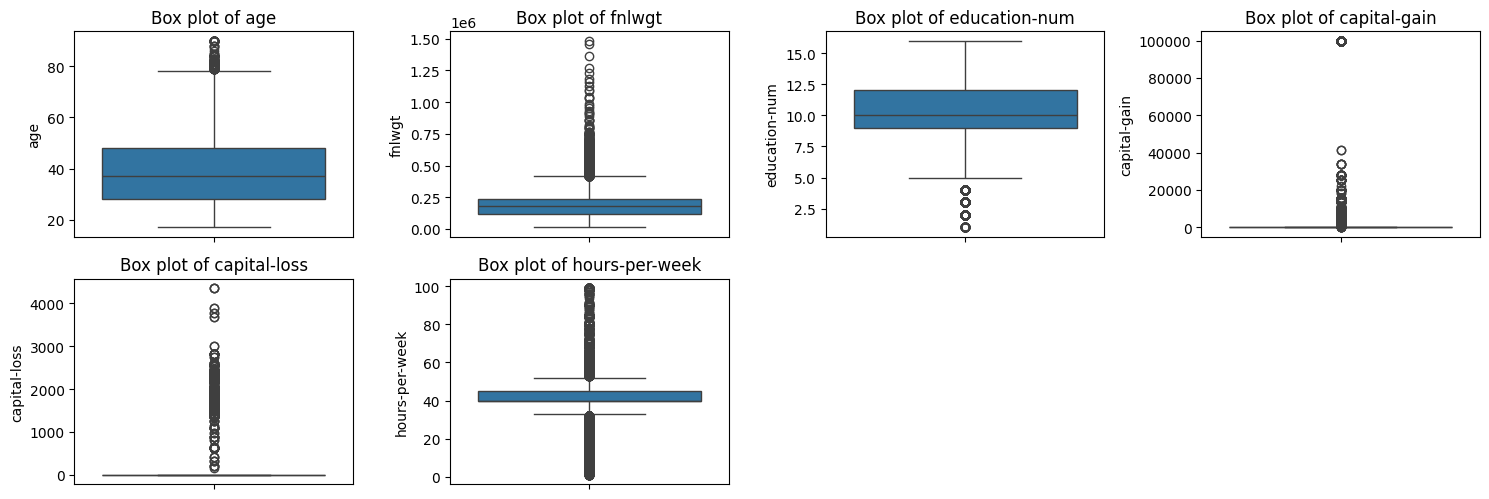

In [8]:
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15,10))
for i , column in enumerate(num_columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [10]:
Q1 = df[num_columns].quantile(0.25)
Q3 = df[num_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bond = Q1 - 1.5 * IQR
upper_bond = Q3 + 1.5 * IQR
df_filtered = df[~((df[num_columns] < lower_bond) | (df[num_columns] > upper_bond)).any(axis=1)]
print(f'Original data shape: {df.shape}')
print(f'Filtered data shape(using IQR): {df_filtered.shape}')

Original data shape: (32561, 15)
Filtered data shape(using IQR): (18997, 15)


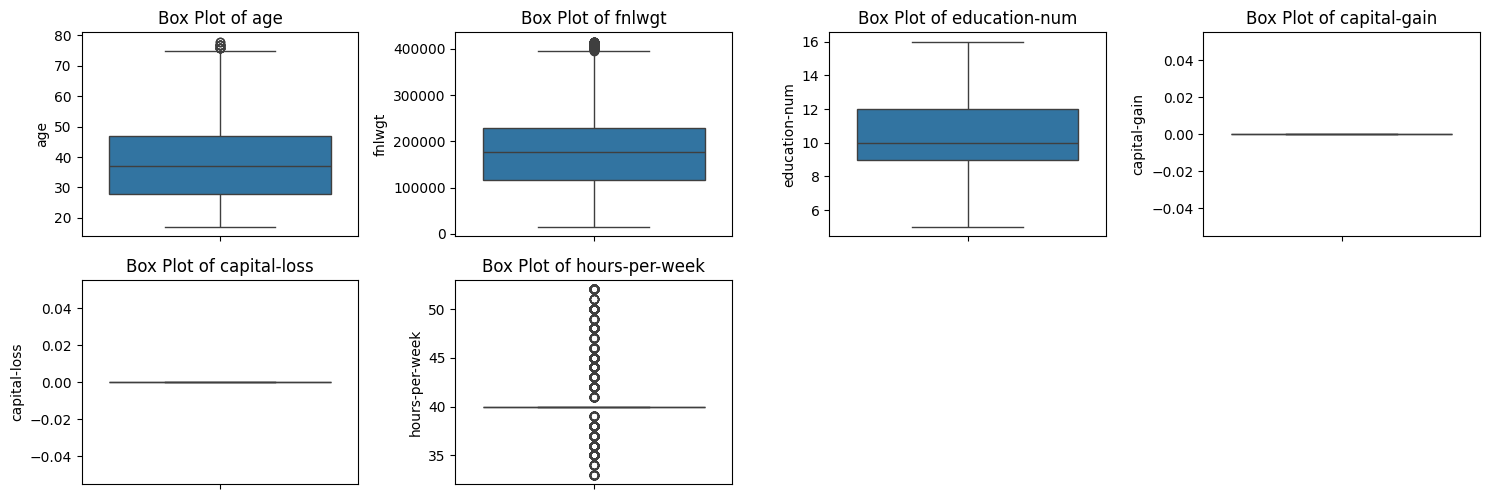

In [11]:
num_columns = df_filtered.select_dtypes(include=[np.number]).columns.tolist()

# Visualizing the initial data with box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_filtered[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [12]:
df_filtered.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)


C:\Users\Jayesh\AppData\Local\Temp\ipykernel_14384\3751816763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)


In [13]:
df_filtered

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K


Encoding

In [14]:
categorical_cols = df_filtered.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


In [16]:
le = LabelEncoder()
df_filtered['income'] = le.fit_transform(df_filtered['income'])

# One-Hot Encoding for nominal columns
nominal_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df_filtered = pd.get_dummies(df_filtered, columns=nominal_cols, drop_first=True)



C:\Users\Jayesh\AppData\Local\Temp\ipykernel_14384\3461379101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['income'] = le.fit_transform(df_filtered['income'])


In [17]:
print(df_filtered)

       age  fnlwgt  education-num  hours-per-week  income  \
2       38  215646              9              40       0   
3       53  234721              7              40       0   
4       28  338409             13              40       0   
5       37  284582             14              40       0   
7       52  209642              9              45       1   
...    ...     ...            ...             ...     ...   
32554   53  321865             14              40       1   
32555   22  310152             10              40       0   
32556   27  257302             12              38       0   
32557   40  154374              9              40       1   
32558   58  151910              9              40       0   

       workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
2                     False                    False                True   
3                     False                    False                True   
4                     False            

Feature Selection

In [18]:
# Split into X (features) and y (target)
X = df_filtered.drop('income', axis=1)  # Features: All columns except 'income'
y = df_filtered['income']  # Target: 'income' column


In [19]:
X

,age,fnlwgt,education-num,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
2,38,215646,9,40,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,40,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,40,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,37,284582,14,40,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,52,209642,9,45,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,321865,14,40,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32555,22,310152,10,40,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32556,27,257302,12,38,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,40,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [20]:
y

2        0
3        0
4        0
5        0
7        1
        ..
32554    1
32555    0
32556    0
32557    1
32558    0
Name: income, Length: 18997, dtype: int64

Heat Map

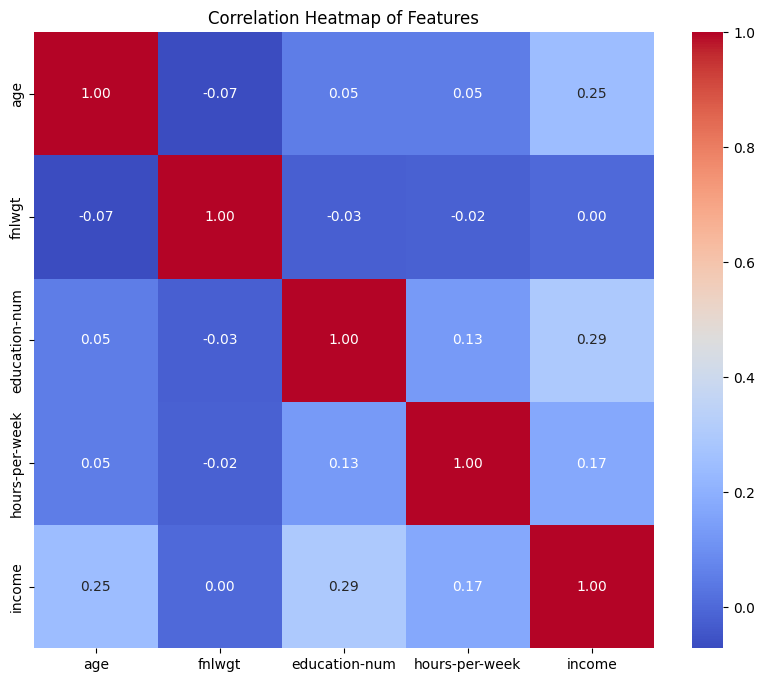

In [24]:
num_columns = df_filtered.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = num_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

Spliting Dataset and Scaling Dataset

In [25]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

Model Selection

In [29]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

Model Performance

Accuracy: 0.8407894736842105
Confusion Matrix:
 [[2835  202]
 [ 403  360]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      3037
           1       0.64      0.47      0.54       763

    accuracy                           0.84      3800
   macro avg       0.76      0.70      0.72      3800
weighted avg       0.83      0.84      0.83      3800



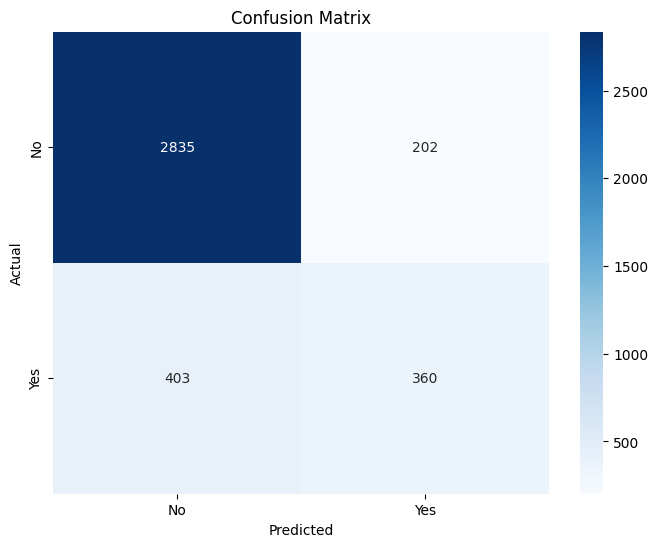

In [30]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()